In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('classic')

In [2]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = '../datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [3]:
def load_housing(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [119]:
housing_data = load_housing()
housing_data = housing_data[housing_data.ocean_proximity != "ISLAND"]

In [120]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [121]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20635 non-null  float64
 1   latitude            20635 non-null  float64
 2   housing_median_age  20635 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20428 non-null  float64
 5   population          20635 non-null  float64
 6   households          20635 non-null  float64
 7   median_income       20635 non-null  float64
 8   median_house_value  20635 non-null  float64
 9   ocean_proximity     20635 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [122]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [75]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


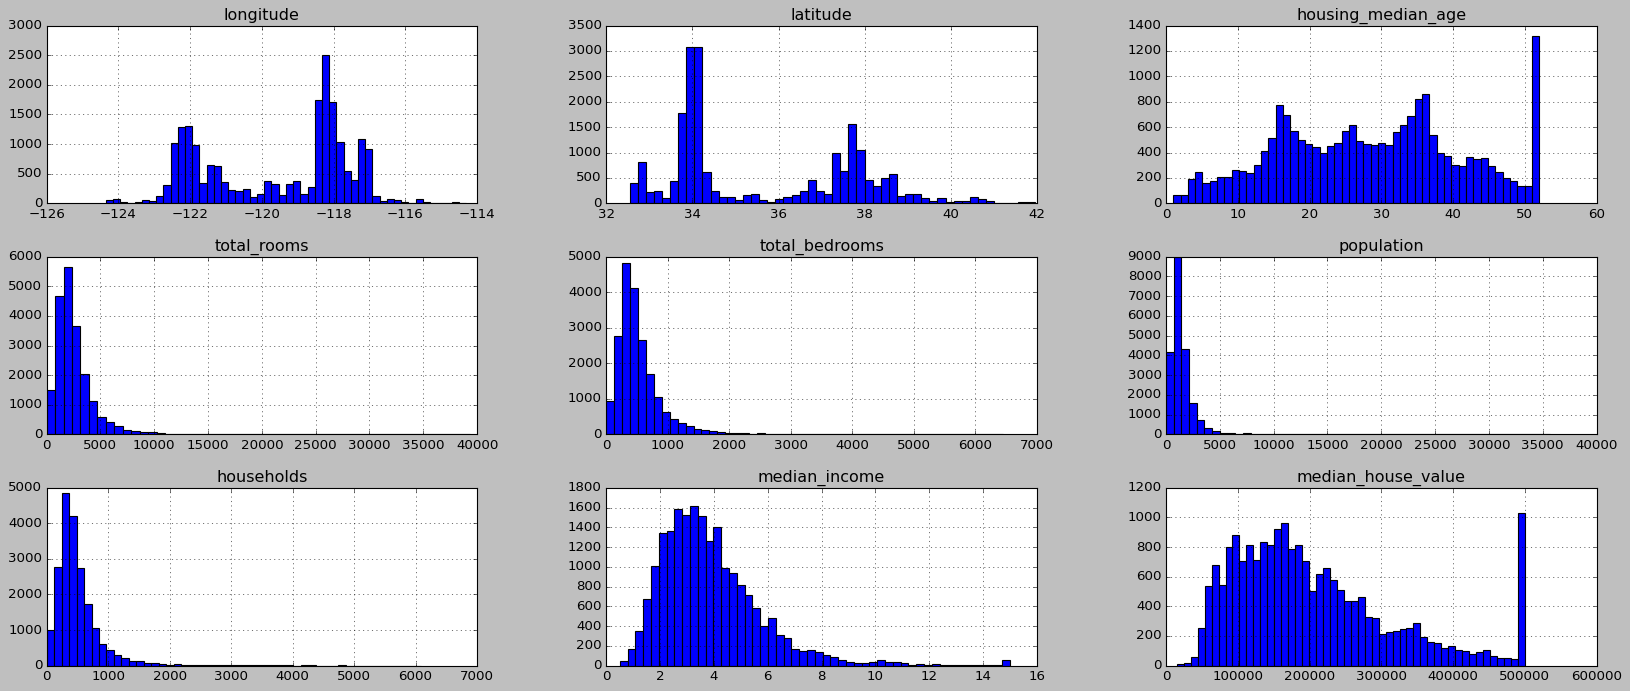

In [123]:
housing_data.hist(bins=50, figsize=(25, 10))
plt.show()

In [124]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1,2,3,4,5])

<AxesSubplot:>

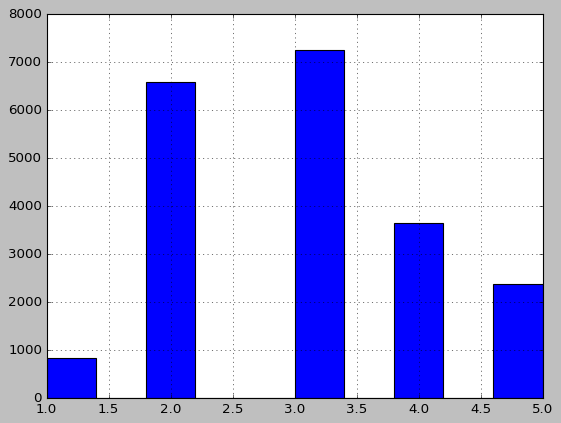

In [125]:
housing_data["income_cat"].hist()

In [127]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
  strat_train_set = housing_data.iloc[train_index]
  strat_test_set = housing_data.iloc[test_index]
  

StratifiedShuffleSplit -> pravi test i train setove ali tako sto pokusava da ima slicnu distribuciju kategorije

In [128]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

/tmp/ipykernel_24263/2301637293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
/tmp/ipykernel_24263/2301637293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [129]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

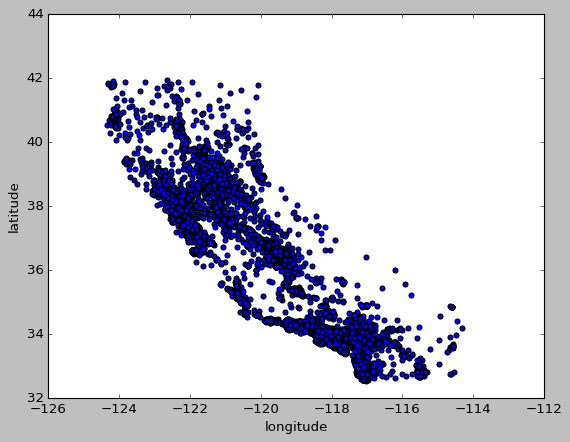

In [130]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

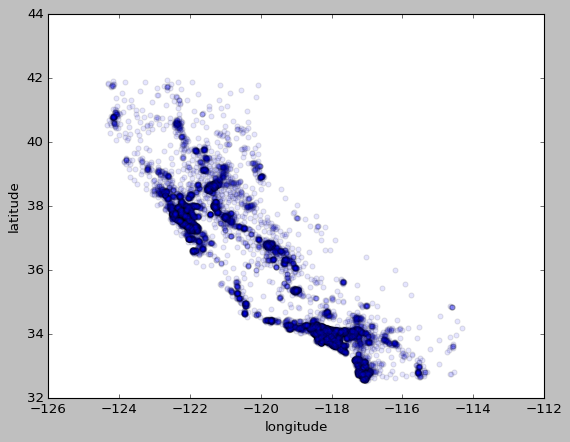

In [131]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

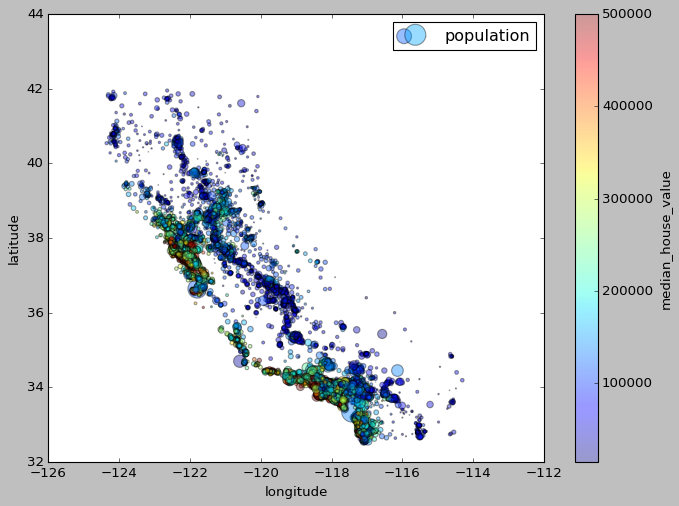

In [132]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [133]:
corr_matrix = housing.corr()

In [134]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688774
total_rooms           0.133986
housing_median_age    0.114206
households            0.062913
total_bedrooms        0.047915
population           -0.028571
longitude            -0.046417
latitude             -0.143956
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

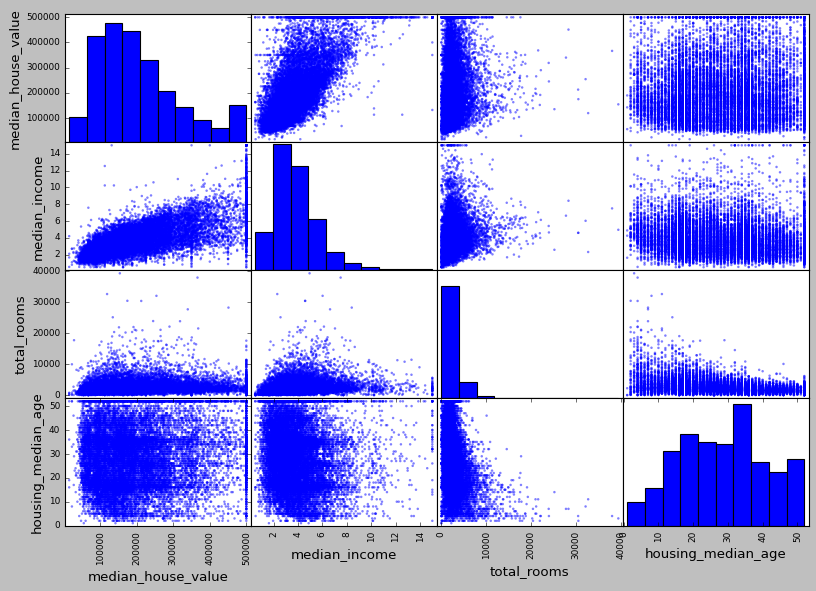

In [135]:
from pandas.plotting import scatter_matrix

atributi = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[atributi], figsize=(12, 8))

In [136]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [137]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688774
rooms_per_household         0.150008
total_rooms                 0.133986
housing_median_age          0.114206
households                  0.062913
total_bedrooms              0.047915
population_per_household   -0.022329
population                 -0.028571
longitude                  -0.046417
latitude                   -0.143956
bedrooms_per_room          -0.259765
Name: median_house_value, dtype: float64

### Preciscavanje podataka

In [138]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Za podatke koji nedostaju imamo 3 opcije:
1. izbrisati sve redove sa NA
2. izbrisati ceo atribut
3. umesto NA vrednosti ubaciti srednje

In [139]:
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [140]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") 

In [141]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [142]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2131.     ,  435.     ,
       1170.     ,  410.     ,    3.54275])

In [143]:
X = imputer.transform(housing_num)

In [144]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [145]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16508 entries, 20125 to 19288
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16508 non-null  float64
 1   latitude            16508 non-null  float64
 2   housing_median_age  16508 non-null  float64
 3   total_rooms         16508 non-null  float64
 4   total_bedrooms      16508 non-null  float64
 5   population          16508 non-null  float64
 6   households          16508 non-null  float64
 7   median_income       16508 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Rad sa tekstualnim i kategorijskim atributima

In [146]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
20125,<1H OCEAN
19247,<1H OCEAN
14834,NEAR OCEAN
12961,INLAND
3757,<1H OCEAN
19934,INLAND
16411,INLAND
20424,NEAR OCEAN
14573,NEAR OCEAN
3043,INLAND


In [147]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.]])

In [148]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

Problem ovog pristupa je sto ce ML algoritam shvatiti dve numericki bliske vrednosti kao bliske npr 0 i 1 ce biti slicni dok su 0 i 4 ustvari slicni<br>
Da bi se ovo zaobislo koristi se one-hot encoding.

In [149]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16508x4 sparse matrix of type '<class 'numpy.float64'>'
	with 16508 stored elements in Compressed Sparse Row format>

Na kraju ovog matrica ce biti sparse SciPy matrica koja umesto da cuva sve nule samo cuva mesta gde nisu nule i tako stedi memoriju.

### Namenski transformeri

In [150]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAtributeAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    return np.c_[X, rooms_per_household, population_per_household]

In [151]:
attr_adder = CombinedAtributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Skaliranje svojstva

Dva nacina:
1. Min-maks skliranje(normalizacija) -> prvo se oduzme min vrednost pa se to podeli sa (max - min)
2. Standardizacija -> prvo se oduzme prosecna vrednost pa se to deli sa standardnim odstupanjem

### Transformacijski cevovodi

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAtributeAdder()),
  ('std_scaler', StandardScaler())
])

In [153]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
  ('num', num_pipeline, num_attribs),
  ("cat", OneHotEncoder(), cat_attribs)
])

In [154]:

housing_prepared = full_pipeline.fit_transform(housing)

## Izbor i obuka modela

In [155]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [167]:
some_data = housing.iloc[25:31]
some_labels = housing_labels.iloc[25:31]
some_data_prepared = full_pipeline.fit_transform(some_data)
print("Predictions: ", list(lin_reg.predict(some_data_prepared)))
print("Labels: ", list(some_labels))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17087    -122.21     37.47                43.0        733.0           162.0   
15467    -117.21     33.19                21.0       3765.0           612.0   
18990    -121.99     38.48                17.0       1824.0           348.0   
20450    -118.91     34.28                 6.0       6106.0          1134.0   
14634    -117.20     32.80                33.0       2573.0           436.0   
1537     -122.04     37.90                20.0       5467.0          1044.0   

       population  households  median_income ocean_proximity  
17087       497.0       175.0         3.2708      NEAR OCEAN  
15467      1722.0       593.0         4.8152       <1H OCEAN  
18990       934.0       305.0         4.6719          INLAND  
20450      3246.0      1062.0         5.2206       <1H OCEAN  
14634      1084.0       443.0         4.2417      NEAR OCEAN  
1537       2310.0       963.0         5.6986        NEAR BAY  
Predi

In [172]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions, housing_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68418.17842776241

In [170]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [176]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0